## Lasso Method 1
I use Lasso to get features ,then use other algorithm

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# Load the California housing dataset
housing = fetch_california_housing()
X, y = pd.DataFrame(housing.data, columns=housing.feature_names), housing.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Lasso regression model
lasso = Lasso(alpha=0.1)  # You can adjust the regularization strength (alpha) as needed

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Extract feature importance (coefficients)
feature_importance = np.abs(lasso.coef_)

# Get the indices of non-zero coefficients (selected features)
selected_feature_indices = np.where(feature_importance != 0)[0]

# Get the selected feature names
selected_features = X_train.columns[selected_feature_indices]

print("Selected Features:")
print(selected_features)

# Transform the training and testing data using selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model = LinearRegression()
model.fit(X_train_selected,y_train)

# Evaluate the model
train_score = model.score(X_train_selected,y_train)
test_score = model.score(X_test_selected, y_test)

print(f"Training R^2 score: {train_score:.2f}")
print(f"Testing R^2 score: {test_score:.2f}")


Selected Features:
Index(['MedInc', 'HouseAge', 'Population', 'AveOccup', 'Latitude',
       'Longitude'],
      dtype='object')
Training R^2 score: 0.60
Testing R^2 score: 0.58


In [ ]:
selected_feature_indices

array([0, 1, 4, 5, 6, 7])

In [ ]:
feature_importance

array([3.92693362e-01, 1.50810624e-02, 0.00000000e+00, 0.00000000e+00,
       1.64168387e-05, 3.14918929e-03, 1.14291203e-01, 9.93076483e-02])

In [ ]:
X_train_selected

,MedInc,HouseAge,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...
11284,6.3700,35.0,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,1777.0,3.178891,37.58,-121.96


## Lasso Method 2
Here we use 'SelectFrom Model'

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
import numpy as np
import pandas as pd

# Load the California housing dataset
housing = fetch_california_housing()
X, y = pd.DataFrame(housing.data, columns=housing.feature_names), housing.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Lasso regression model with alpha (regularization strength)
alpha = 0.1  # You can adjust the regularization strength as needed
model = Lasso(alpha=alpha)

# Perform feature selection using SelectFromModel
selector = SelectFromModel(model)
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected features
selected_features = np.array(X_train.columns)[selector.get_support()]

print("Selected Features:")
print(selected_features)

# Transform the testing data
X_test_selected = selector.transform(X_test)

# Fit the model using the selected features
model.fit(X_train_selected, y_train)

# Evaluate the model
train_score = model.score(X_train_selected, y_train)
test_score = model.score(X_test_selected, y_test)

print(f"Training R^2 score: {train_score:.2f}")
print(f"Testing R^2 score: {test_score:.2f}")


Selected Features:
['MedInc' 'HouseAge' 'Population' 'AveOccup' 'Latitude' 'Longitude']
Training R^2 score: 0.55
Testing R^2 score: 0.53


In [ ]:
selector.get_support()

array([ True,  True, False, False,  True,  True,  True,  True])

##  Tree-based feature selection Method 1
Here it automatically choses no.features

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
import pandas as pd

# Load the California housing dataset
housing = fetch_california_housing()
X, y = pd.DataFrame(housing.data, columns=housing.feature_names), housing.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Use SelectFromModel for feature selection
selector = SelectFromModel(estimator=rf)
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected features
selected_features_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_features_indices]

print("Selected Features:")
print(selected_features)

# Transform the testing data
X_test_selected = selector.transform(X_test)

# Train a new model using only the selected features
rf_selected = RandomForestRegressor(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Evaluate the model
train_score = rf_selected.score(X_train_selected, y_train)
test_score = rf_selected.score(X_test_selected, y_test)

print(f"Training R^2 score: {train_score:.2f}")
print(f"Testing R^2 score: {test_score:.2f}")


Selected Features:
Index(['MedInc', 'AveOccup'], dtype='object')
Training R^2 score: 0.93
Testing R^2 score: 0.51


In [ ]:
selector.get_support(indices=True)

array([0, 5])

In [ ]:
X.columns[[0,5]]

Index(['MedInc', 'AveOccup'], dtype='object')

In [ ]:
X_train_selected

array([[3.2596    , 3.6918138 ],
       [3.8125    , 1.73809524],
       [4.1563    , 2.72321429],
       ...,
       [2.9344    , 3.33206831],
       [5.7192    , 3.17889088],
       [2.5755    , 2.10869565]])

## Tree-based feature selection Method 2
Here we specifiying how many features needed

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

# Load the California housing dataset
housing = fetch_california_housing()
X, y = pd.DataFrame(housing.data, columns=housing.feature_names), housing.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Sort indices of features by importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Select top features (e.g., top 5)
top_features_indices = sorted_indices[:5]

# Get the names of top features
top_features = X_train.columns[top_features_indices]

print("Top Features:")
print(top_features)

# Transform the training and testing data to retain only the top features
X_train_selected = X_train.iloc[:, top_features_indices]
X_test_selected = X_test.iloc[:, top_features_indices]

# Train a new model using only the top features
rf_selected = RandomForestRegressor(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Evaluate the model
train_score = rf_selected.score(X_train_selected, y_train)
test_score = rf_selected.score(X_test_selected, y_test)

print(f"Training R^2 score: {train_score:.2f}")
print(f"Testing R^2 score: {test_score:.2f}")


Top Features:
Index(['MedInc', 'AveOccup', 'Latitude', 'Longitude', 'HouseAge'], dtype='object')
Training R^2 score: 0.97
Testing R^2 score: 0.80


In [ ]:
barh = pd.DataFrame(feature_importances,X_train.columns)

In [ ]:
barh.T

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.524871,0.054593,0.044272,0.029606,0.03065,0.138443,0.088936,0.088629


<Axes: >

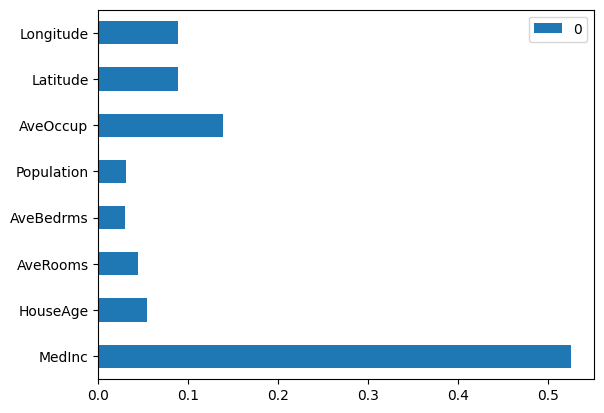

In [ ]:
import matplotlib.pyplot as plt
barh.plot.barh()

In [ ]:
feature_importances

array([0.52487148, 0.05459322, 0.04427185, 0.02960631, 0.03064978,
       0.13844281, 0.08893574, 0.08862881])

In [ ]:
X_train.columns[top_features_indices]

Index(['MedInc', 'AveOccup', 'Latitude', 'Longitude', 'HouseAge'], dtype='object')

In [ ]:
np.argsort(feature_importances)[::-1]

array([0, 5, 6, 7, 1, 2, 4, 3])

In [ ]:
top_features_indices

array([0, 5, 6, 7, 1])